# Aggregate Random Forest Analysis
Since random forests are randomized by nature of the algorithm, we will be applying a random forest several times (100) to try and determine the actual importance of individual features

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score
import sklearn

In [2]:
africa = pd.read_csv('africa-ML-DataFactors-updated.csv')
africa = africa.dropna('columns')
africa=sklearn.utils.shuffle(africa)
labels = africa['sahoStatusEHA']
data = africa.drop(columns=['sahoStatusEHA', 'country', 'christCountry', 'cumCasesLag1', 'cumCasesLag1P100KC', 'cumDeathsLag1', 'ebolaCasesN', 'gdpPerCap', 'medDocsN']).select_dtypes(['number'])
#data = data.sample()

train_num = 44


training_data = data[0:train_num]
training_labels = list(labels[0:train_num])

test_data = data[train_num:]
test_labels = list(labels[train_num:])

<ipython-input-2-98e3cdb6de07>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  africa = africa.dropna('columns')


<ipython-input-3-be63ba28eed5>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.hist(np.array([training_labels, test_labels]) , 3,  histtype='bar', label=['training', 'test'])


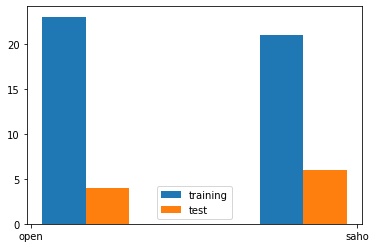

In [3]:
plt.hist(np.array([training_labels, test_labels]) , 3,  histtype='bar', label=['training', 'test'])
plt.legend()

In [4]:
feature_importance = {}
for i in np.arange(1000):
    rf = RandomForestClassifier(n_estimators = 50, max_depth=30, criterion='entropy')
    rf.fit(training_data, training_labels)
    predictions = rf.predict(test_data)
    # Collect 10 most important features
    importance = pd.DataFrame({'feature': training_data.columns, 'importance': np.round(rf.feature_importances_, 3)})
    importance.sort_values('importance', ascending=False, inplace=True)
    importance = importance[:10]
    # Assign values to dictionary
    for imp in importance.values:
        if imp[0] not in feature_importance.keys():
            # If the key is not already there then add it
            feature_importance[imp[0]] = [imp[1]]
        else:
            feature_importance[imp[0]].append(imp[1])

In [5]:
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index')
final_features = feature_importance_df.agg(['mean', 'std', 'sem'], axis=1).sort_values('mean', ascending=False)[:25]
final_features['95-conf'] = 1.96*final_features['sem']
final_features['99-conf'] = 3*final_features['sem']

print(final_features)

                                    mean       std       sem   95-conf  \
dayNum                          0.042036  0.012187  0.000415  0.000814   
ExternalFactor                  0.041324  0.012490  0.000427  0.000838   
tempDiffS                       0.038390  0.011148  0.000406  0.000796   
ICREGDURS                       0.033461  0.008586  0.000336  0.000660   
tempDiff66                      0.033352  0.008360  0.000342  0.000669   
ciaArea                         0.033303  0.008174  0.000333  0.000652   
revZtempDiffSunfitted           0.033080  0.008433  0.000364  0.000714   
tempDiffSunfitted               0.033042  0.008083  0.000346  0.000679   
prevAdopt                       0.032282  0.008027  0.000377  0.000738   
SocialFactor                    0.032006  0.007534  0.000345  0.000675   
ciaMedianAge                    0.029095  0.005802  0.000351  0.000688   
casesMD                         0.028798  0.005855  0.000376  0.000738   
ITNETUSERZS                     0.0283

Text(0, 0.5, 'Importance of Feature (%)')

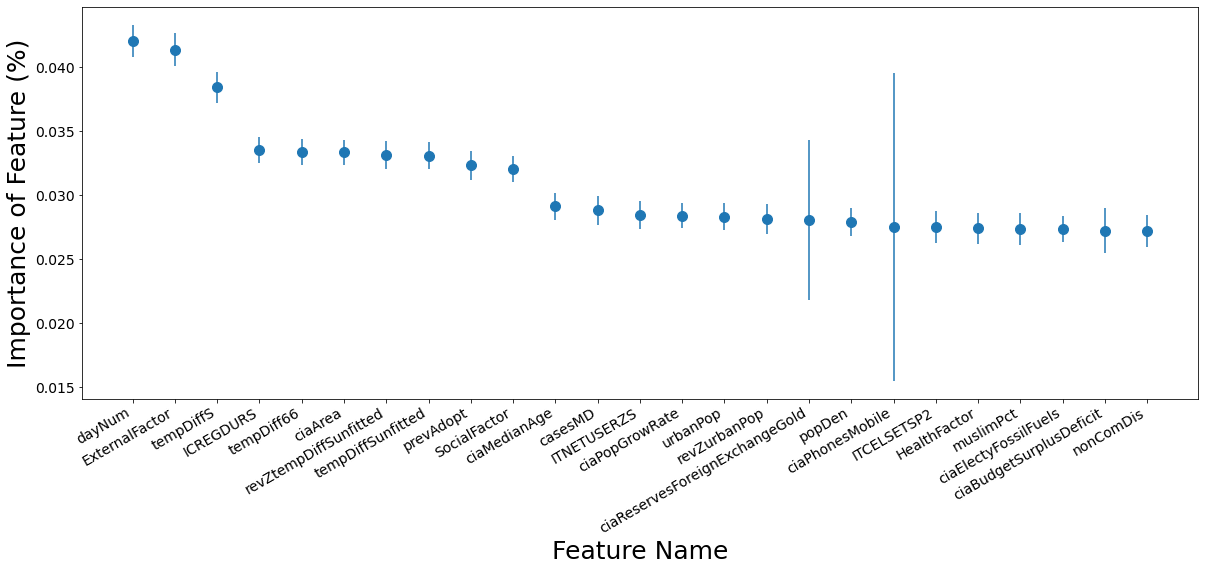

In [6]:
#with plt.xkcd():
fig = plt.figure(figsize=(20,8))
plt.errorbar(final_features.index, 'mean', yerr='99-conf', data=final_features, fmt='o', ms=10)
#plt.xticks(rotation=-60)
fig.autofmt_xdate()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature Name', fontsize=25)
plt.ylabel('Importance of Feature (%)', fontsize=25)
#plt.savefig('Feature-Importance.png')

In [7]:
predictions = rf.predict(test_data)
print(classification_report(test_labels, predictions, labels=list(set(test_labels))))

              precision    recall  f1-score   support

        open       0.67      1.00      0.80         4
        saho       1.00      0.67      0.80         6

    accuracy                           0.80        10
   macro avg       0.83      0.83      0.80        10
weighted avg       0.87      0.80      0.80        10



# Without tempDiffS

In [8]:
data.columns

Index(['dayNum', 'ENATMPM25MCM3', 'ICREGDURS', 'IPJRNARTCSC', 'ITCELSETSP2',
       'ITNETUSERZS', 'SGGENPARLZS', 'SHDYNMORT', 'WespFuelExp',
       'WespHvyIndbt',
       ...
       'revZmuslimPct', 'revZnonComDis', 'revZurbanPop', 'HealthFactor',
       'SocialFactor', 'EconomicFactor', 'revZtempDiffSunfitted',
       'ExternalFactor', 'UnconventionalFactor', 'ZUnconventionalFactor2'],
      dtype='object', length=103)

In [9]:
data = africa.drop(columns=['sahoStatusEHA', 'dayNum', 'revZmuslimPct', 'revZurbanPop', 'revZnonComDis', 'revZtempDiffSunfitted', 'tempDiffS' ,'country', 'tempDiff66', 'christCountry', 'cumCasesLag1', 'cumCasesLag1P100KC', 'cumDeathsLag1', 'ebolaCasesN', 'gdpPerCap', 'medDocsN']).select_dtypes(['number'])
data = data.drop(columns=['deathsMD', 'cumDeathsLag1P100KC'])
train_num = 40

training_data = data[0:train_num]
training_labels = list(labels[0:train_num])

test_data = data[train_num:]
test_labels = list(labels[train_num:])

In [16]:
feature_importance = {}
for i in np.arange(1000):
    rf = RandomForestClassifier(n_estimators = 50, max_depth=30, criterion='entropy')
    rf.fit(training_data, training_labels)
    predictions = rf.predict(test_data)
    # Collect 10 most important features
    importance = pd.DataFrame({'feature': training_data.columns, 'importance': np.round(rf.feature_importances_, 3)})
    importance.sort_values('importance', ascending=False, inplace=True)
    importance = importance[:10]
    # Assign values to dictionary
    for imp in importance.values:
        if imp[0] not in feature_importance.keys():
            # If the key is not already there then add it
            feature_importance[imp[0]] = [imp[1]]
        else:
            feature_importance[imp[0]].append(imp[1])

In [17]:
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index')
final_features = feature_importance_df.agg(['mean', 'std', 'sem'], axis=1).sort_values('mean', ascending=False)[:30]
final_features['95-conf'] = 1.96*final_features['sem']
final_features.to_csv('africa-ML-DataFactors-updated-factors.csv')

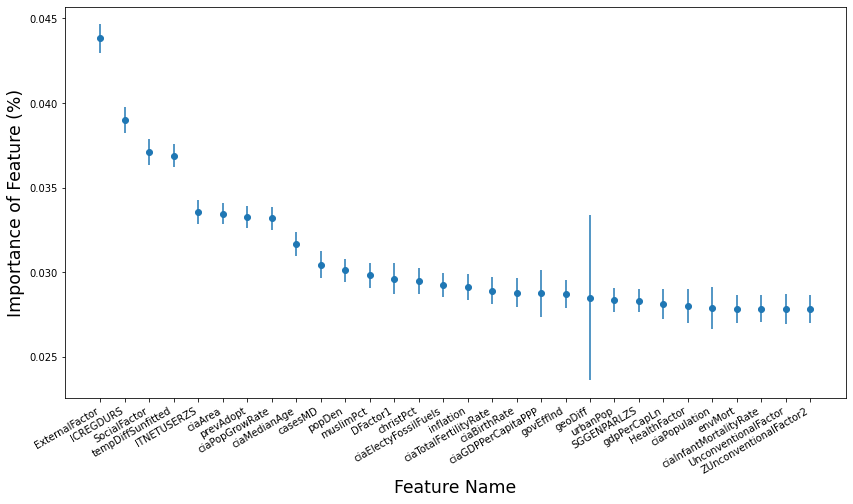

In [18]:
#with plt.xkcd():
fig = plt.figure(figsize=(14,8))
plt.errorbar(final_features.index, 'mean', yerr='95-conf', data=final_features, fmt='o')
#plt.xticks(rotation=-60)
fig.autofmt_xdate()
plt.xlabel('Feature Name', size='xx-large', fontname='Comic Sans MS')
plt.ylabel('Importance of Feature (%)', size='xx-large', fontname='Comic Sans MS')
plt.savefig('africa-ML-DataFactors-updated.png')

In [19]:
print(classification_report(test_labels, predictions, labels=list(set(test_labels))))

              precision    recall  f1-score   support

        open       0.75      0.86      0.80         7
        saho       0.83      0.71      0.77         7

    accuracy                           0.79        14
   macro avg       0.79      0.79      0.78        14
weighted avg       0.79      0.79      0.78        14



## F1-score weighted average as a function of the number of parameters kept
We will use 5, 10, 15, 20, 25, and 30 parameters while recording the weighted average f1-score.feature_importance

In [14]:
final_features_ordered = final_features.to_dict()
print(final_features_ordered['mean'].keys())

dict_keys(['ExternalFactor', 'ICREGDURS', 'tempDiffSunfitted', 'SocialFactor', 'ciaArea', 'prevAdopt', 'ITNETUSERZS', 'ciaPopGrowRate', 'ciaMedianAge', 'ciaElectyFossilFuels', 'popDen', 'casesMD', 'christPct', 'ciaCurrentAcctBalance', 'muslimPct', 'SGGENPARLZS', 'inflation', 'urbanPop', 'ciaBirthRate', 'gdpPerCapLn', 'ZUnconventionalFactor2', 'ciaElectyHydroPlants', 'govEffInd', 'ciaTotalFertilityRate', 'HealthFactor', 'DFactor1', 'nonComDis', 'ciaGDPRealGrowthRate', 'ciaPopulation', 'ciaInfantMortalityRate'])


In [15]:
for num in [1,5,10,15,20,25,30]:
    final_used_features = list(final_features_ordered['mean'].keys())[:num]
    print(final_used_features)
    rf = RandomForestClassifier(n_estimators = 50, max_depth=30, criterion='entropy')
    rf.fit(training_data[final_used_features], training_labels)


    predictions = rf.predict(test_data[final_used_features])
    print(classification_report(test_labels, predictions, labels=list(set(test_labels))))

['ExternalFactor']
              precision    recall  f1-score   support

        open       0.80      0.57      0.67         7
        saho       0.67      0.86      0.75         7

    accuracy                           0.71        14
   macro avg       0.73      0.71      0.71        14
weighted avg       0.73      0.71      0.71        14

['ExternalFactor', 'ICREGDURS', 'tempDiffSunfitted', 'SocialFactor', 'ciaArea']
              precision    recall  f1-score   support

        open       0.75      0.43      0.55         7
        saho       0.60      0.86      0.71         7

    accuracy                           0.64        14
   macro avg       0.68      0.64      0.63        14
weighted avg       0.67      0.64      0.63        14

['ExternalFactor', 'ICREGDURS', 'tempDiffSunfitted', 'SocialFactor', 'ciaArea', 'prevAdopt', 'ITNETUSERZS', 'ciaPopGrowRate', 'ciaMedianAge', 'ciaElectyFossilFuels']
              precision    recall  f1-score   support

        open       0.71   